In [59]:
# invisible
import numpy as np
np.core.arrayprint._line_width = 65
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300




## Python, NumPy and Wahrscheinlichkeiten

### Einführung

<img width="40%" class="imgright" src="../images/dice.webp" srcset="../images/dice_400w.webp 400w,../images/dice_350w.webp 350w,../images/dice_300w.webp 300w" alt="dice" />

*"Every American should have above average income, and my Administration is going to see they get it."* 

Wir beginnen mit diesem Zitat von Bill Clinton unser Kapitel über Statistik, weil es ein besonders hervorstechendes Beispiel eines weit vorherrschenden Problems ist. Ein Problem, was der Mathematiker John Allen Paulos in einem seiner Bücher als "Innumeracy" bezeichnet hatte. (Paulos, John Allen. 1988. "Innumeracy, Mathematical Illiteracy and its consequences". New York. Hill and Wang) Ein Ausdruck für den es noch keine deutsche Übersetzung gibt, aber soviel bedeutet wie "numerischer Analphabetismus". Darunter versteht er die weit-verbreitete Unfähigkeit einfachste statistische und wahrscheinlichkeitstheoretische Zusammenhänge zu begreifen. Während Analphabetismus in allen Gesellschaften und Gesellschaftskreisen geächtet wird, gilt "innumeracy" als tolerierbar. Nehmen wir an, es gäbe ein Land, in dem fast alle Leute eine grüne Hautfarbe hätten, außer einer blaufarbigen Minderheit. Nun können wir davon ausgehen, dass es unter beiden Gruppen Verbrecher geben wird. Stellen wir uns aber vor, dass innerhalb kurzer Zeit Zeitungen mit Artikeln der Form "Blauer mordet Mutter von zwei Kindern" oder "Polizei ermittelt erneut gegen Blauen im Fall XYZZ!" veröffentlicht werden. Über die gleichzeitig stattfindenden Straftaten von Menschen grüner Hautfarbe wird jedoch nicht berichtet. Numerischer Analphabetismus bedeutet nun, dass Leute auf die Strasse gehen und gegen die durch "Blaue" ausgelöste Gewalt demonstrieren, Politiker ein mögliches Problem bei Blauen untersuchen wollen oder gar zu erkenen glauben und so weiter. 




<br>



Statistik und Wahrscheinlichkeitsrechnung begegnet uns nahezu überall in unserem Leben. Wir müssen damit umgehen, häufig wenn wir zwischen verschiedenen Alternativen zu wählen haben. Können wir morgen wandern gehen, oder wird es regnen? Die Wettervorhersage sagt uns, dass die Niederschlagswahrscheinlichkeit bei 30% liegt. Was jetzt? Können wir es riskieren?
<br>
Anderes Szenario:
Sie spielen jede Woche Lotto und träumen von einer weit entfernten Insel. Wie hoch ist die Wahrscheinlichkeit, den Jackpot zu gewinnen, sodass Sie niemals mehr arbeiten müssen und im "Paradies" leben können? Nicht sehr wahrscheinlich, aber nun stellen Sie sich vor, dass Sie den Jackpot geknackt haben. Wie groß ist die Wahrscheinlichkeit, dass Sie auf der Insel Ihrer Träume, weit weg von zu Hause, Ihren Nachbarn treffen? Wie hoch sind die Chancen, dass so etwas passiert?
<br>

Die Ungewissheit umgibt uns, und nur einige Menschen verstehen die Grundlagen der Wahrscheinlichkeitstheorie.

Die Programmiersprache Python und die Module NumPy und SciPy helfen uns nicht, die oben genannten alltäglichen Probleme zu verstehen. Jedoch bieten Python und NumPy starke Funktionalitäten, um Probleme der Statistik und Wahrscheinlichkeitstheorie zu berechnen.

<br><br>

### Zufallszahlen mit Python





#### Die Module random und secrets




Das Modul ```secrets``` wurde erst mit Python 3.6 neu eingeführt. Mit diesem Modul kann man kryptografisch starke Pseudozufallszahlen erzeugen, die sich als Passwörter, Tokens oder Ähnliches eignen. Dieses Modul wurde mit diesem Ziel entwickelt. Als Generator enthält es eine CSPRNG (Cryptographically Strong Pseudo Random Number Generator). Das ```random```-Modul von Python wurde nicht in Hinblick auf kryptografische Anwendungen entwickelt. Der Fokus dieses Moduls lag auf Modellbildungen und Simulationen. 

Es gibt sogar eine ausdrückliche Warnung in der Dokumentation des ```random```-Modules:
 
<br><br>




<p style="color: green; background-color: #ffff42">
Warnung: Beachten Sie bitte, dass der Pseudo-Zufalls-Generator im random-Modul NICHT für sicherheitsrelevante Zwecke benutzt werden sollte. Benutzen Sie secrets ab Python 3.6+ und os.urandom() bei Python 3.6+ und früher.
<br>
Im Original: "Note that the pseudo-random generators in the random module should NOT be used for security purposes. Use secrets on Python 3.6+ and os.urandom() on Python 3.5 and earlier."</p>



Man kann allerdings die ```SystemRandom```-Klasse des ```random```-Moduls verwenden, die die sichere ```os.urandom```-Systemfunktion benutzt. 





```random.SystemRandom``` und ```secrets.SystemRandom``` sind identisch.


Mit der Funktion ```random.random``` können wir eine Zufallszahl im halb-offenen Intervall ```[0, 1)``` erzeugen: 




In [60]:
import random
random_number = random.random()
print(random_number)

0.38478750165423237



Nun wollen wir eine kryptografisch starke Zufallszahl erzeugen:

In [61]:
from secrets import SystemRandom
# from random import SystemRandom   # äquivalent
crypto = SystemRandom()
print(crypto.random())

0.9204267821655968


#### Erzeugen einer Liste von Zufallszahlen

Häufig benötigen wir mehr als eine Zufallszahl. Die folgende Funktion ```random_list``` kann eine Liste von Zufallszahlen mit vorgegebener Anzahl erzeugen. Mit dem Parameter ```secure``` können wir steuern, ob wir sichere, also mit ```SystemRandom``` erzeugte Zahlen wollen:  


In [62]:
import random

def random_list(n, secure=True):
    random_floats = []
    if secure:
        crypto = random.SystemRandom()
        random_float = crypto.random
    else:
        random_float = random.random
    for _ in range(n):
        random_floats.append(random_float())
    return random_floats

print(random_list(3, secure=False))

[0.7909000388784871, 0.10284379569236879, 0.050261473684067526]


Im Folgenden können wir sehen, dass der Preis für die Sicherheit eine deutliche Erhöhung der Rechenzeit bedeutet:

In [63]:
%%timeit
random_list(100, secure=True)

357 µs ± 5.46 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [64]:
%%timeit
random_list(100, secure=False)

7.18 µs ± 485 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Am einfachsten, was den Programmieraufwand betrifft, und am schnellsten, was die Laufzeit betrifft, lassen sich Zufallszahlen mit dem ```random```-Untermodul von ```numpy``` erzeugen:

In [65]:
import numpy as np

np.random.random(10)

array([0.25935606, 0.07716387, 0.84629528, 0.83033122, 0.72322316,
       0.06717942, 0.21947731, 0.37639418, 0.49988897, 0.55997848])

In [66]:
%%timeit
np.random.random(100)

1.6 µs ± 8.23 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


Allerdings werden auch hier keine sicheren Zufallszahlen erzeugt!

<br><br>

### Zufällige Integer-Zahlen mit Python

Jeder ist mit der Generierung von Zufallszahlen ohne Computer vertraut. Wenn Sie einen Würfel werfen, erhalten Sie eine Zufallszahl zwischen 1 und 6. Im Zusammenhang mit der Wahrscheinlichkeitstheorie nennen wir "Werfen eines Würfels" ein Experiment, dessen Menge der möglichen Ergebnisse {1, 2, 3, 4, 5, 6} ist. Diese Menge wird auch als "Stichprobenraum" bezeichnet.


Integer-Zahlen könnten wir relativ einfach aus dem erzeugen, was wir schon kennengelernt haben. Unsere Funktion erzeugt Zahlen im halboffenen Intervall zwischen ```start``` und ```stop```, also ```[start, stop)```:

In [67]:
def randint(start, stop, secure=True):
    if secure:
        crypto = random.SystemRandom()
        rnd = crypto.random
    else:
        rnd = random.random
    result = int(rnd() * (stop-start)) + start
    return result

[ randint(3, 7) for i in range(20)]

[5, 4, 4, 6, 4, 6, 6, 6, 3, 3, 4, 3, 6, 5, 6, 6, 5, 4, 5, 3]

Es empfiehlt sich jedoch, die Funktion ```randint``` zu nutzen, die die Module ```random```, ```secrets``` und ```numpy.random``` bietet .

In [68]:
import random

# randint
outcome = random.randint(1, 6)
print(outcome)

1


In [69]:
import secrets

c = secrets.SystemRandom()
print(c.randint(1, 6))

3


Würfeln wir sehr oft, so sollte jede Augenzahl ungefähr in einem Sechstel der Fälle auftreten. Wir testen dies im Folgenden. Das Zählen erledigen wir mit der ```Counter```-Klasse aus dem ```collections```-Modul:

In [70]:
from collections import Counter
import random

c = Counter()

anzahl_wuerfe = 100000
for wurf in range(anzahl_wuerfe):
    augenzahl = random.randint(1, 6)
    c[augenzahl] += 1
    
print(c)
for augenzahl in c:
    print(f"Augenzahl: {augenzahl}, \
          relative Häufigkeit: {c[augenzahl]/anzahl_wuerfe}")

Counter({2: 16862, 3: 16687, 4: 16675, 1: 16639, 6: 16604, 5: 16533})
Augenzahl: 1,           relative Häufigkeit: 0.16639
Augenzahl: 5,           relative Häufigkeit: 0.16533
Augenzahl: 2,           relative Häufigkeit: 0.16862
Augenzahl: 6,           relative Häufigkeit: 0.16604
Augenzahl: 3,           relative Häufigkeit: 0.16687
Augenzahl: 4,           relative Häufigkeit: 0.16675


Obiges Beispiel lässt sich mit der random-Funktion aus dem NumPy-Modul einfacher realisieren.

In [71]:
import numpy as np
from collections import Counter

anzahl_wuerfe = 100000
outcome = np.random.randint(1, 7, size=anzahl_wuerfe)

c = Counter(outcome)
for augenzahl in c:
    print(f"Augenzahl: {augenzahl}, \
          relative Häufigkeit: {c[augenzahl]/anzahl_wuerfe}")

Augenzahl: 2,           relative Häufigkeit: 0.16764
Augenzahl: 6,           relative Häufigkeit: 0.16496
Augenzahl: 5,           relative Häufigkeit: 0.16557
Augenzahl: 3,           relative Häufigkeit: 0.16739
Augenzahl: 1,           relative Häufigkeit: 0.16742
Augenzahl: 4,           relative Häufigkeit: 0.16702


Sicherlich haben Sie bemerkt, dass wir in ```random.randint``` beim zweiten Parameter ein 7 statt einer 6 verwendet haben. Diese Funktion nutzt ein "halb-offenes" Intervall im Gegensatz zu Pythons ```random```-Modul, das ein geschlossenes Intervall erwartet.

Die formale Definition:

```numpy.random.randint(low, high=None, size=None)```

Diese Funktion liefert zufällige ganze Zahlen zwischen "low" (inklusiv) und "high" (exklusiv).
Mit anderen Worten: ```randint``` liefert zufällige Integers aus der diskret uniformen Distribution im "halb-offenen" Intervall [```low```, ```high```).

Wenn für ```high``` der Wert ```None``` oder nichts übergeben wird, liegen die Ergebnisse in der Range von [0, ```low```).

Der Parameter ```size``` definiert die Shape des Ergebnisses.
Wenn für ```size``` None oder nichts übergeben wird, generiert die Funktion einen Integer-Wert.
Andernfalls ist das Ergebnis ein Array.
```size``` sollte ein Tupel sein. Wenn als ```size``` ein Integer n übergeben wird, entspricht dies dem Tupel (n,).

Folgende Beispiele verdeutlichen das Verhalten der Parameter:

In [72]:
import numpy as np

print("Eine Integer-Zahl: ", 
      np.random.randint(1, 7))
print("\nEin eindimensionales Array mit einem Element:\n",
      np.random.randint(1, 7, size=1))
print("\nEin eindimensionales Array mit zehn Elementen:\n", 
      np.random.randint(1, 7, size=10))
print("\nWie eben, aber alternative size-Definition:\n", 
      np.random.randint(1, 7, size=(10,))) 
print("\nZweidimensionales Array:\n", 
      np.random.randint(1, 7, size=(5, 4)))

Eine Integer-Zahl:  4

Ein eindimensionales Array mit einem Element:
 [3]

Ein eindimensionales Array mit zehn Elementen:
 [5 3 5 4 3 1 2 5 5 1]

Wie eben, aber alternative size-Definition:
 [2 3 1 6 1 2 5 4 4 4]

Zweidimensionales Array:
 [[3 5 2 5]
 [1 3 3 5]
 [1 2 4 3]
 [3 2 4 1]
 [6 3 2 3]]



Wir können das Würfeln mit dem Code ```np.random.randint(1, 7, size=1)``` aus dem NumPy-Modul simulieren oder anhand des Codes ```random.randint(1, 6)``` aus dem Standard-random-Modul. Wir nehmen an, dass unser Würfel fair ist, d.h. die Wahrscheinlichkeit für jede Seite bei 1/6 liegt. 

Wie können wir einen gezinkten Würfen simulieren? Die ```randint```-Methoden beider Module sind dafür nicht geeignet.
Wir werden im Folgenden ein paar Funktionen schreiben, um das Problem zu lösen.

Zunächst schauen wir uns weitere nützliche Funktionen des ```random```-Moduls an.

<br><br>

### Stichproben/Auswahlen


<br>

```choice``` ist eine weitere extrem nützliche Funktion des ```random```-Moduls. Sie kann genutzt werden, um aus einer nicht-leeren Sequenz ein zufälliges Element zu wählen.

Sequenzen können beispielsweise Listen, Strings und Tupels sein, aber auch Iteratoren. Das bedeutet, wir sind in der Lage, aus einem String ein zufälliges Zeichen zu holen oder ein zufälliges Element aus einer Liste oder einem Tupel:

In [73]:
from random import choice

professions = ["scientist", "philosopher", "engineer", "priest"]
print(choice("abcdefghij"))
print(choice(professions))
print(choice(("apples", "bananas", "cherries")))
print(choice(range(10)))

i
scientist
apples
9


```choice``` liefert zufällig ein Objekt aus einer nicht-leeren Sequenz, wobei die Chancen für die Elemente, ausgewählt zu werden, gleichmäßig verteilt sind.
So liegt die Chance für die Rückgabe von ```scientist``` beim Aufruf von ```choice(profession)``` bei 1/4.
Das hat allerdings wenig mit der Realität zu tun. Um die Realität nachzubilden benötigen wir auch hier -- wie beim gezinkten Würfel -- eine gewichtete Auswahl.

Wir definieren nun eine Funktion ```weighted_choice```, die wie ```random.choice``` ein zufälliges Element einer Sequenz zurückliefert, jedoch sind die Elemente der Sequenz gewichtet.

<br>

### Zufallsintervalle



Bevor wir mit dem Design der gewichteten Auswahl beginnen, definieren wir eine Funktion ```find_interval(x, partition)```, die wir für unsere ```weighted_choice```-Funktion brauchen. ```find_interval``` erwartet zwei Argumente:

- Einen numerischen Wert x
- Eine Liste oder einen Tupel mit numerischen Werten p<sub>0</sub>, p<sub>1</sub>, p<sub>2</sub>, ... p<sub>n</sub>

Die Funktion liefert i zurück, wenn p<sub>i</sub> < x < p<sub>i+1</sub>. -1 wird zurückgeliefert, wenn x kleiner als p<sub>0</sub> ist oder x größer oder gleich p<sub>n</sub> ist.

In [74]:
def find_interval(x, partition):
    """ find_interval -> i
        partition ist eine Sequenz von numerischen Werten
        x ist eine Int- oder Float-Zahl
        Bei dem Rückgabewert "i" handelt es sich um den Index
        für den gilt partition[i] < x < partition[i+1], 
        falls solch ein Index existiert. -1 ansonsten
    """
    
    for i in range(0, len(partition)):
        if x < partition[i]:
            return i-1
    return -1


I = [0, 3, 5, 7.8, 9, 12, 13.8, 16]
for x in [-1.3, 0, 0.1, 3.2, 5, 6.2, 7.9, 10.8, 13.9, 15, 16, 16.5]:
    print(find_interval(x, I), end=", ")

-1, 0, 0, 1, 2, 2, 3, 4, 6, 6, -1, -1, 

<br><br>

### Gewichtete Zufallsauswahl

Jetzt können wir die ```weighted_choice```-Funktion definieren.
Nehmen wir an, dass wir drei Gewichtungen haben, d.h. 1/5, 1/2 und 3/10. Wir bilden die kumulative Summe der Gewichtungen mit ```np.cumsum(weights)```.

In [75]:
import numpy as np

weights = [0.2, 0.5, 0.3]
cum_weights = [0] + list(np.cumsum(weights))
print(cum_weights)

[0, 0.2, 0.7, 1.0]


Wenn wir eine Zufallszahl x zwischen 0 und 1 mit ```random.random()``` generieren, so ist die Wahrscheinlichkeit, dass x im Intervall ```[0, cum_weights[0])``` liegt, 1/5. Die Wahrscheinlichkeit, dass x im Intervall ```[cum_weights[0], cum_weights[1])``` liegt, ist 1/2. Letztlich ist die Wahrscheinlichkeit, dass x im Intervall ```[cum_weights[1], cum_weights[2])``` , bei 3/10.

Jetzt sind Sie in der Lage, die grundlegende Idee zu verstehen, auf der ```weighted_choice``` basiert:

In [76]:
import numpy as np

def weighted_choice(sequence, weights):
    """ 
    weighted_choice wählt ein Zufallselement aus 
    'sequence' aus unter Berücksichtigung der
    List bzw. Tupel von Gewichten
    """
    x = np.random.random()
    cum_weights = [0] + list(np.cumsum(weights))
    index = find_interval(x, cum_weights)
    return sequence[index]


**Beispiel:**

Wir können die Funktion ```weighted_choice``` nun für die folgende Aufgabe verwenden:
Stellen wir uns vor, dass wir einen gezinkten Würfel haben, sodass für die Wahrscheinlichkeiten des Auftretens der Augenzahlen 6 und 1 gilt:  P(6)=3/12 und P(1)=1/12. 
Die Wahrscheinlichkeit für alle anderen möglichen Ergebnisse sind gleich, d.h. P(2) = P(3) = P(4) = P(5) = p.
Wir können p wie folgt ausrechnen mit

```1 - P(1) - P(6) = 4 x p```

Das entspricht

```p = 1/6```

Wie können wir diesen Würfel mit unserer ```weighted_choice```-Funktion simulieren?

Wir rufen ```weighted_choice``` mit den Augenzahlen des Würfels und der Liste der korrespondierenden Gewichte auf. Jeder Aufruf entspricht einem Wurf des gezinkten Würfels.

Wir sehen, dass nach 10.000 Würfen die geschätzte Wahrscheinlichkeit der Gewichtung entspricht

In [77]:
from collections import Counter

faces_of_dice = [1, 2, 3, 4, 5, 6]
weights = [1/12, 1/6, 1/6, 1/6, 1/6, 3/12]

outcomes = []
n = 10000
for _ in range(n):
    outcomes.append(weighted_choice(faces_of_dice, weights))

c = Counter(outcomes)
for key in c:
    c[key] = c[key] / n
    
print(sorted(c.values()))


[0.0832, 0.1654, 0.1682, 0.169, 0.1697, 0.2445]


Die Werte der Aufteilungs-Liste definieren die Intervalle, in denen wir den Wert x erwarten. Wenn der Wert x kleiner als p<sub>0</sub> oder grösser/gleich p<sub>n</sub>, liefern wir -1 zurück.

Wir könnten unsere erste Unterteilung als ein Intervall von 
 

- &infin;
 
bis p<sub>0</sub> definieren und 0 zurückliefern. Die letzte Unterteilung wäre dann ein Intervall von p<sub>n</sub> bis  
&infin;.

Um zwischen beiden Fällen unterscheiden zu können, erweitern wir die Funktion <code>find_interval</code> um den Parameter "endpoints". "True" entspricht unserem Eingangs erwähnten Vorgehen. "False" entspricht unserem soeben beschriebenen Fall.

In anderen Worten - Wenn "endpoints" False ist, passiert folgendes:
- i wird zurückgegeben wenn x kleiner als p<sub>i</sub> ist
- len(partition) wird zurückgegeben, wenn x größer oder gleich p<sub>len(partition)-1</sub> ist.

Wir demonstrieren dies im folgenden Diagramm:

Die neue Funktion sieht folgendermaßen aus:

In [78]:
def find_interval(x, 
                  partition, 
                  endpoints=True):
    """ 
    find_interval -> i
    Falls endpoints gleich True ist, ist "i" der Index für den gilt
    partition[i] < x < partition[i+1] gilt, falls solch ein Index 
    existiert. -1 otherwise
        
    Falls endpoints gleich False ist, ist "i" der kleinste
    Index für den x < partition[i] gilt. Falls kein solcher
    Index existiert, len(partition) auf i gesetzt.
    """
    for i in range(0, len(partition)):
        if x < partition[i]:
            return i-1 if endpoints else i
    return -1 if endpoints else len(partition)

I = [0, 3, 5, 7.8, 9, 12, 13.8, 16]
print("Endpunkte sind inbegriffen:")
for x in [-1.3, 0, 0.1, 3.2, 5, 6.2, 7.9, 13.9, 15, 16, 16.5]:
    print(find_interval(x, I), end=", ")
print("\nEndpunkte sind nicht inbegriffen:")
for x in [-1.3, 0, 0.1, 3.2, 5, 6.2, 7.9, 13.9, 15, 16, 16.5]:
    print(find_interval(x, I, endpoints=False), end=", ")


Endpunkte sind inbegriffen:
-1, 0, 0, 1, 2, 2, 3, 6, 6, -1, -1, 
Endpunkte sind nicht inbegriffen:
0, 1, 1, 2, 3, 3, 4, 7, 7, 8, 8, 

<br><br>

### Stichproben mit Python



<br>

Eine Sample oder Stichprobe kann als ein repräsentativer Teil einer größeren Gruppe angesehen werden, die wir "Population" nennen.

Das Modul ```numpy.random``` beinhaltet die Funktion ```random_sample```, die zufällige Float-Werte im halb-offenen Intervall ```[0.0, 1.0)```  liefert. 
Die Ergebnisse sind gleichmäßig über das angegebene Intervall verteilt. Die Funktion erwartet lediglich einen Parameter ```size```, der die Shape der Ausgabe definiert.
Wenn wir die ```size``` zum Beispiel mit (3, 4) angeben, erhalten wir ein Array mit der Shape (3, 4), das mit Zufallswerten gefüllt ist:

In [79]:
import numpy as np

x = np.random.random_sample((3, 4))
print(x)

[[0.45711549 0.09158949 0.4548514  0.04671449]
 [0.96838841 0.1316467  0.09991307 0.71975092]
 [0.82073319 0.70767492 0.99399057 0.00218589]]


Wenn <code>random_sample</code> mit einem Integer-Wert aufgerufen wird, erhalten wir ein eindimensionales Array. Ein Integer-Wert bewirkt den gleichen Effekt, wie ein einfaches Tupel als Argument:

In [80]:
x = np.random.random_sample(7)
print(x)

y = np.random.random_sample((7,))
print(y)


[0.85343344 0.89420157 0.86387465 0.62418901 0.01643744 0.53475791
 0.75412648]
[0.64027827 0.70709433 0.825084   0.18850273 0.0087134  0.58973563
 0.07864032]


Es können ebenfalls Arrays aus einem beliebigen Intervall ```[a, b)``` generiert werden, wobei ```a``` kleiner als ```b``` sein muss. Das kann wie folgt aussehen:

```(b - a) * random_sample() + a```

Beispiel:

In [81]:
a = -3.4
b = 2

A = (b - a) * np.random.random_sample((3, 4)) + a

print(A)

[[-0.61985952  0.00678915  0.23543105  0.61122334]
 [-3.03073703 -1.49931968 -3.00836952 -2.79980084]
 [-0.41013124 -1.47345358 -1.23384511  1.05400615]]


Das Standard-Modul ```random``` von Python hat eine allgemeinere Funktion ```sample```, die Stichproben einer Population produziert. Die Population ist eine Sequenz, also beispielsweise eine Liste, Menge oder ein String. 

Die Syntax von ```sample```:

```sample(population, k)```

Die Funktion erstellt eine Liste, die k Elemente aus der ```population``` beinhaltet.
Die Ergebnisliste beinhaltet keine Duplikate, wenn in der Population keine Duplikate vorkommen.

Wenn eine Sample aus einer Range von Integer-Werten ausgewählt werden soll, dann können -- oder besser sollten -- Sie ```range``` als Argument für die Population verwenden.

Im folgenden Beispiel ziehen wir sechs Zahlen aus der Range zwischen 1 und 49 (inklusive). Das entspricht einer Lotto-Ziehung in Deutschland:

In [82]:
import random

print(random.sample(range(1, 50), 6))

[13, 28, 26, 19, 36, 31]


In [83]:
def weighted_sample(population, weights, k):
    """ 
    weighted_sample zieht eine Zufallsstichprobe der
    Länge k aus der Sequenz 'population' entsprechend
    der Liste der Gewichte.
    """
    sample = set()
    population = list(population)
    weights = list(weights)
    while len(sample) < k:
        choice = weighted_choice(population, weights)
        sample.add(choice)
        index = population.index(choice)
        weights.pop(index)
        population.remove(choice)
        weights = [ x / sum(weights) for x in weights]
    return list(sample)


In [84]:
def weighted_sample_alternative(population, weights, k):
    """ 
    weighted_sample zieht eine Zufallsstichprobe der
    Länge k aus der Sequenz 'population' entsprechend
    der Liste der Gewichte.
    """
    sample = set()
    population = list(population)
    weights = list(weights)
    while len(sample) < k:
        choice = weighted_choice(population, weights)
        if choice not in sample:
            sample.add(choice)
    return list(sample)

Beispiel:

Nehmen wir an, wir haben acht Zuckerstücke in den Farben rot, grün, blau, gelb, schwarz, weiß, pink und orange. Unser Freund Peter hat für die Farben die "gewichteten" Vorlieben 1/24, 1/6, 1/6, 1/12, 1/12, 1/24, 1/8, 7/24. Peter darf sich 3 Zuckerstücke aussuchen:

In [85]:
balls = ["red", "green", "blue", "yellow", "black", 
         "white", "pink", "orange"]
weights = [ 1/24, 1/6, 1/6, 1/12, 1/12, 1/24, 1/8, 7/24]
for i in range(10):
    print(weighted_sample(balls, weights, 3))

['pink', 'blue', 'orange']
['pink', 'blue', 'orange']
['black', 'pink', 'orange']
['white', 'blue', 'orange']
['red', 'yellow', 'white']
['red', 'pink', 'yellow']
['pink', 'blue', 'green']
['white', 'green', 'orange']
['black', 'blue', 'white']
['black', 'green', 'orange']


Im Folgenden vergleichen wir die beiden Varianten, gewichtete Stichproben zu berechnen:

In [86]:
n = 10000
orange_counter = 0
orange_counter_alternative = 0
for i in range(n):
    if "orange" in weighted_sample(balls, weights, 3):
        orange_counter += 1
    if "orange" in weighted_sample_alternative(balls, weights, 3):
        orange_counter_alternative += 1 
        
print(orange_counter / n)
print(orange_counter_alternative / n)

0.7135
0.7154


<br><br>

### Kartesische Auswahl



Die Funktion ```cartesian_choice```, die wir im Folgenden definieren werden, ist nach dem Kartesischen Produkt aus der Mengenlehre benannt.


#### Kartesisches Produkt



Das kartesische Produkt, auch Mengenprodukt genannt, ist ein Konstruktionsprinzip, um aus Mengen eine neue Menge zu konstruieren.   

Für zwei Mengen ```A``` und ```B``` ist das kartesische Produkt ```A x B``` die Menge aller geordneten Paare ```(a, b)```, für die ```a ∈ A``` und ```b ∈ B``` gilt:



```A x B = { (a, b) | a &isin; A and  b &isin; B }```



Ganz allgemein besteht das kartesische Produkt mehrerer Mengen aus der Menge aller Tupel von Elementen der Mengen, wobei die Reihenfolge der Mengen und damit der entsprechenden Elemente fest vorgegeben ist. Die Ergebnismenge des kartesischen Produkts wird auch Produktmenge, Kreuzmenge oder Verbindungsmenge genannt. 



Wenn wir n Mengen haben A<sub>1</sub>,  A<sub>2</sub>, ... A<sub>n</sub>, können wir das kartesische Produkt entsprechend  wie folgt bilden:

A<sub>1</sub> x A<sub>2</sub> x ... x A<sub>n</sub> = { (a<sub>1</sub>,  a<sub>2</sub>, ... a<sub>n</sub>) | a<sub>1</sub> &isin; A<sub>1</sub>, 
a<sub>2</sub> &isin; A<sub>2</sub>, ... a<sub>n</sub> &isin; A<sub>n</sub>]

Das kartesische Produkt aus n Mengen wird manchmal auch n-faches kartesisches Produkt genannt.

#### Kartesische Auswahl: cartesian_choice


Wir schreiben nun eine Funktion ```cartesian_choice```, die eine beliebige Anzahl von iterierbaren Argumenten erwartet und eine Liste zurückliefert, die eine zufällige Auswahl von jedem Iterator in der entsprechenden Reihenfolge beinhaltet.

Aus mathematischer Sicht können wir das Ergebnis der Funktion ```cartesian_choice``` als Element des kartesischen Produkts der übergebenen iterierbaren Argumente ansehen.

In [87]:
import random

def cartesian_choice(*iterables):
    """
    cartesian_choice erzeugt eine Liste deren i-tes Element 
    einer zufälligen Auswahl aus dem i-ten Eingabeargument entspricht.
    Die Ergebnisliste kann als kartesisches Produkt über die iterierbaren
    Eingabeobjekte gesehen werden.
    """
    res = []
    for population in iterables:
        res.append(random.choice(population))
    return res


cartesian_choice(["The", "A"],
                 ["red", "green", "blue", "yellow", "grey"], 
                 ["car", "house", "fish", "light"],
                 ["smells", "dreams", "blinks"])


['A', 'red', 'house', 'blinks']

Wir definieren nun eine gewichtete Version der vorher definierten Funktion:

In [88]:
import random

def weighted_cartesian_choice(*iterables):
    """
    weighted_cartesian_choice liefert eine Liste mit
    gewichteten Auswahlen aus den iterierbaren Eingabeobjekten
    unter Wahrung der Reihenfolge.
    """
    res = []
    for population, weight in iterables:
        lst = weighted_choice(population, weight)
        res.append(lst)
    return res

determiners = (["The", "A", "Each", "Every", "No"], 
               [0.3, 0.3, 0.1, 0.1, 0.2])
colours = (["red", "green", "blue", "yellow", "grey"], 
           [0.1, 0.3, 0.3, 0.2, 0.2])
nouns = (["door", "elephant", "fish", "light", 
          "programming language", "Python"], 
         [0.2, 0.2, 0.1, 0.1, 0.3, 0.1])
nouns2 = (["of happiness", "of chocolate", "of wisdom", 
           "of challenges", "of air"], 
         [0.5, 0.2, 0.1, 0.1, 0.1])
verb_phrases = (["smells", "dreams", "thinks", 
                 "is made", "consists"], 
         [0.1, 0.3, 0.3, 0.2, 0.1])

print("It may or may not be true:")
for i in range(10):
    res = weighted_cartesian_choice(determiners,
                                    colours,
                                    nouns,
                                    verb_phrases,
                                    nouns2)
    print(" ".join(res) + ".")


It may or may not be true:
No green Python thinks of happiness.
Each yellow Python smells of happiness.
The red elephant thinks of happiness.
The blue programming language smells of challenges.
No green door smells of chocolate.
A green fish dreams of wisdom.
The green programming language consists of chocolate.
No red programming language is made of happiness.
The yellow door thinks of air.
The grey programming language is made of challenges.


In der folgenden Version prüfen wir, ob alle "Wahrscheinlichkeiten" korrekt sind:

In [89]:
import random

def weighted_cartesian_choice(*iterables):
    """
    weighted_cartesian_choice liefert eine Liste mit
    gewichteten Auswahlen aus den iterierbaren Eingabeobjekten
    unter Wahrung der Reihenfolge.
    """
    res = []
    for population, weight in iterables:
        lst = weighted_choice(population, weight)
        res.append(lst)
    return res

determiners = (["The", "A", "Each", "Every", "No"], 
               [0.3, 0.3, 0.1, 0.1, 0.2])
colours = (["red", "green", "blue", "yellow", "grey"], 
           [0.1, 0.3, 0.3, 0.2, 0.2])
nouns = (["water", "elephant", "fish", "light", "programming language"], 
         [0.3, 0.2, 0.1, 0.1, 0.3])
nouns2 = (["of happiness", "of chocolate", "of wisdom", 
           "of challenges", "of air"], 
         [0.5, 0.2, 0.1, 0.1, 0.1])
verb_phrases = (["smells", "dreams", "thinks", "is made of"], 
         [0.4, 0.3, 0.2, 0.1])

print("It may or may not be true:")
sentences = []
for i in range(10000):
    res = weighted_cartesian_choice(determiners,
                                    colours,
                                    nouns,
                                    verb_phrases,
                                    nouns2)
    sentences.append(" ".join(res) + ".")

words = ["smells", "dreams", "thinks", "is made of"]
from collections import Counter
c = Counter()
for sentence in sentences:
    for word in words:
        if word in sentence:
            c[word] += 1
  
wsum = sum(c.values())
for key in c:
    print(key, c[key] / wsum)




It may or may not be true:
dreams 0.3057
thinks 0.1981
smells 0.3928
is made of 0.1034


### Echte Zufallszahlen



Zur Erzeugung echter Zufallszahlen kann man physikalische Phänomene nutzen. Man kann sie aus radioaktiven Zerfallsprozessen oder dem Rauschen elektronischer Bauelemente gewinnen. Aber es geht auch einfacher. Beispielsweise durch Werfen einer oder mehrerer Münzen oder unter Benutzung von Würfeln. Diese Verfahren sind jedoch einerseits zeitaufwendig oder technisch kompliziert zu bewerkstelligen. 

Wie wir bereits geschrieben haben, liefert das random-Modul von Python keine "echten" oder "wahren" Zufallszahlen. Die meisten Programme liefern nur Zufallszahlen, die pseudozufällig sind. Die Zahlen werden in einer vorhersehbaren Art generiert, weil der verwendete Algorithmus deterministisch ist. Pseudozufallszahlen sind für viele Situation gut genug, aber sie sind nicht "wirklich" zufällig, wenn man beispielsweise Würfel- oder Lotterie-Ziehungen simulieren will.



Die Webseite [RANDOM.ORG](http://www.random.org) erhebt den Anspruch "wahre" Zufallszahlen zu generieren. Sie nutzen die Zufälligkeit aus atmosphärischen Geräuschen. Diese Zahlen sind für viele Anwendungen besser als die pseudozufälligen Zahlen aus einem Algorithmus in Computer-Programmen.



<br><br>

### Seed/Startwert







<img width="30%" class="imgright" src="../images/random_seed.webp" srcset="../images/random_seed_350w.webp 350w,../images/random_seed_300w.webp 300w" alt="Random Seed" />


Unter einem "Seed Key" oder einfach nur Seed (deutsch wörtlich "Saatschlüssel") versteht man einen Wert, mit dem ein Zufallszahlengenerator initialisiert wird. Deshalb bezeichnet man ihn häufig auch als Startwert einer Zufallsfolge. Der Zufallszahlengenerator erzeugt mit der Seed als Startwert eine Folge von Zufallszahlen bzw. Pseudozufallszahlen. Startet man einen Algorithmus mit dem gleichen Seed-Wert, erhält man auch exakt die gleichen Pseudozufallszahlen.

Verwendet man Zufallszahlen in der Kryptographie, um damit verschlüsselte Daten zu erzeugen, so möchte man normalerweise nicht, dass die Seed erraten werden kann. In diesem Fall sollte die Seed ein Zufallswert sein. Diesen kann man beispielsweise in einem Programm durch das Hin- und Herbewegen einer Maus erzeugen. 

Wenn wir ```random.random()``` aufrufen, so erwarten wir einen Zufallswert zwischen 0 und 1. ```random.random()``` berechnet einen neuen Zufallswert anhand des vorangegangenen Zufallswertes. Wie sieht es aber aus, wenn wir diese Funktion zum ersten Mal in unserem Programm verwenden? Genau, dann gibt es noch keinen vorangegangenen Zufallswert. Wenn ein Zufallgenerator zum ersten Mal aufgerufen wird, so muss der erste "Zufalls"-Wert irgendwie erzeugt werden.

Setzt man den Startwert, also die Seed, eines Pseudo-Zufallszahlen-Generators, so stellt man einen ersten Zufallswert zur Verfügung. Aus diesem wird dann deterministisch eine Sequenz von weiteren Zufallswerten generiert. Startet man wieder eine Zufallsfolge mit dem gleichen Startwert, so erhält man wieder exakt dieselbe Folge von Werten. Kennt man also den Startwert, kann man auch die aus diesem erzeugten verschlüsselten Werte berechnen.

Geht es also um Sicherheit, braucht man einen Weg, einen echten Zufallswert als Startwert zu verwenden. 

Zufällige Startwerte werden in vielen Programmiersprachen anhand des Systemstatus generiert, der meistens der Systemzeit entspricht.

Für Python trifft dies ebenfalls zu. ```help(random.seed)``` sagt, dass wenn die Funktion mit ```None``` oder keinem Argument aufgerufen wird, der Seedwert aus der aktuellen Systemzeit oder einer anderen systemspezifischen Zufallsquelle generiert wird.

In [90]:
# prog4web
import random

help(random.seed)

Help on method seed in module random:

seed(a=None, version=2) method of random.Random instance
    Initialize internal state from hashable object.
    
    None or no argument seeds from current time or from an operating
    system specific randomness source if available.
    
    If *a* is an int, all bits are used.
    
    For version 2 (the default), all of the bits are used if *a* is a str,
    bytes, or bytearray.  For version 1 (provided for reproducing random
    sequences from older versions of Python), the algorithm for str and
    bytes generates a narrower range of seeds.





Die ```seed```-Funktion liefert eine deterministische Sequenz von Zufallszahlen. Die Sequenz kann beliebig wiederholt werden, um beispielsweise bestimmte Situationen zu debuggen.

In [91]:
import random

random.seed(42)

for _ in range(10):
    print(random.randint(1, 10), end=", ")
    
print("\nNochmals die selben Zufallszahlen:")
random.seed(42)
for _ in range(10):
    print(random.randint(1, 10), end=", ")


2, 1, 5, 4, 4, 3, 2, 9, 2, 10, 
Nochmals die selben Zufallszahlen:
2, 1, 5, 4, 4, 3, 2, 9, 2, 10, 

<br><br>

### Gauss'sche Normalverteilung



Bei ```random.gauss``` und ```random.normalvariate``` handelt es sich um zwei verschiedene Implementierungen von Funktionen, die jeweils normalverteilte Zufallszahlen zurückliefern. 




Wir möchten nun 1000 Zufallszahlen zwischen 130 und 230 generieren die eine Gausssche Verteilung aufweisen mit dem Hauptwert ```mu = 550``` und eine Standardabweichung von ```sigma = 30```.

Wenn wir uns die help-Information anschauen, sehen wir, dass der wesentliche Unterschied darin besteht, dass ```gauss``` etwas schneller ist und nicht Thread-sicher, während ```random.normalvariate``` Thread-sicher ist.

In [92]:
import random

help(random.normalvariate)
help(random.gauss)

Help on method normalvariate in module random:

normalvariate(mu, sigma) method of random.Random instance
    Normal distribution.
    
    mu is the mean, and sigma is the standard deviation.

Help on method gauss in module random:

gauss(mu, sigma) method of random.Random instance
    Gaussian distribution.
    
    mu is the mean, and sigma is the standard deviation.  This is
    slightly faster than the normalvariate() function.
    
    Not thread-safe without a lock around calls.



Wir berechnen uns nun mittels der Funktion ```gauss``` 1000 Zufallzahlen mit einem Mittelwert von 180 und einer Standardabweichung von 30:

In [93]:
from random import gauss

n = 1000

values = []
frequencies = {}

while len(values) < n:
    value = int(gauss(180, 30))
    if 130 < value < 230:
        frequencies[value] = frequencies.get(value, 0) + 1
        values.append(value)
values[:7]    

[173, 183, 186, 214, 199, 183, 157]

Das folgende Programm zeichnet die Zufallswerte, die wir soeben generiert haben. Wir haben das Modul ```matplotlib``` bis jetzt noch nicht behandelt. Das ist aber für das Verständnis des folgenden Codes nicht unbedingt notwendig:

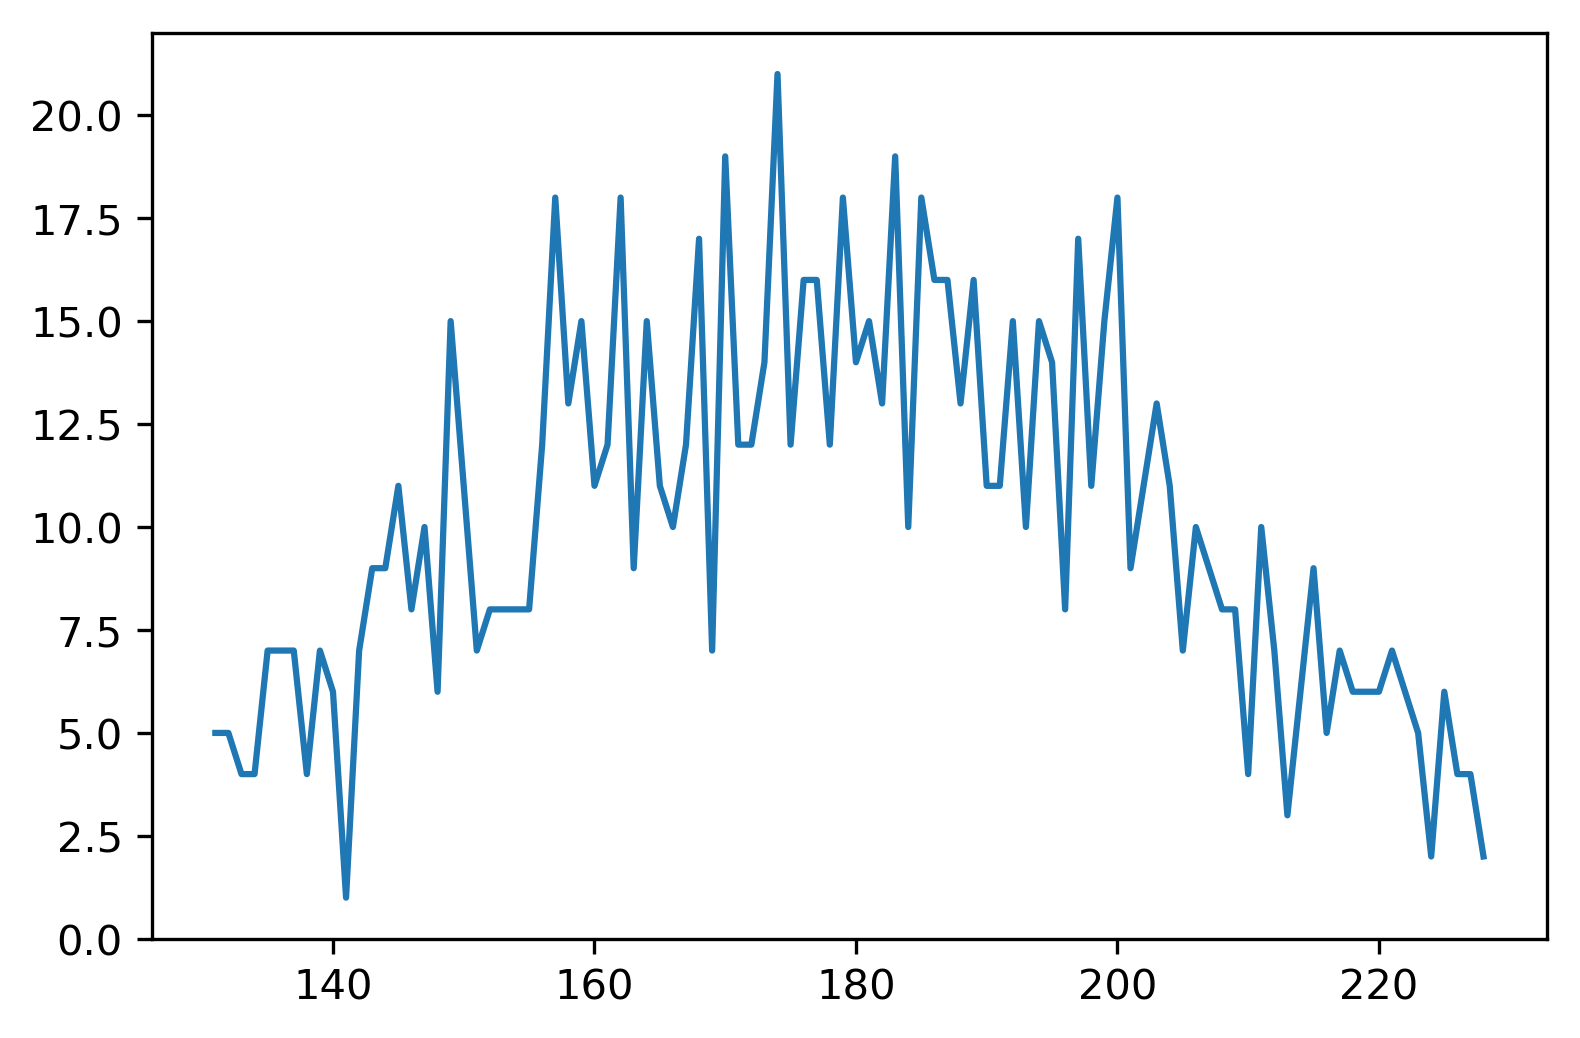

In [94]:
import matplotlib.pyplot as plt

freq = list(frequencies.items())
freq.sort()


plt.plot(*list(zip(*freq)))
plt.show()

Wir können dies natürlich auch mit der Funktion ```normalvariate``` durchführen:

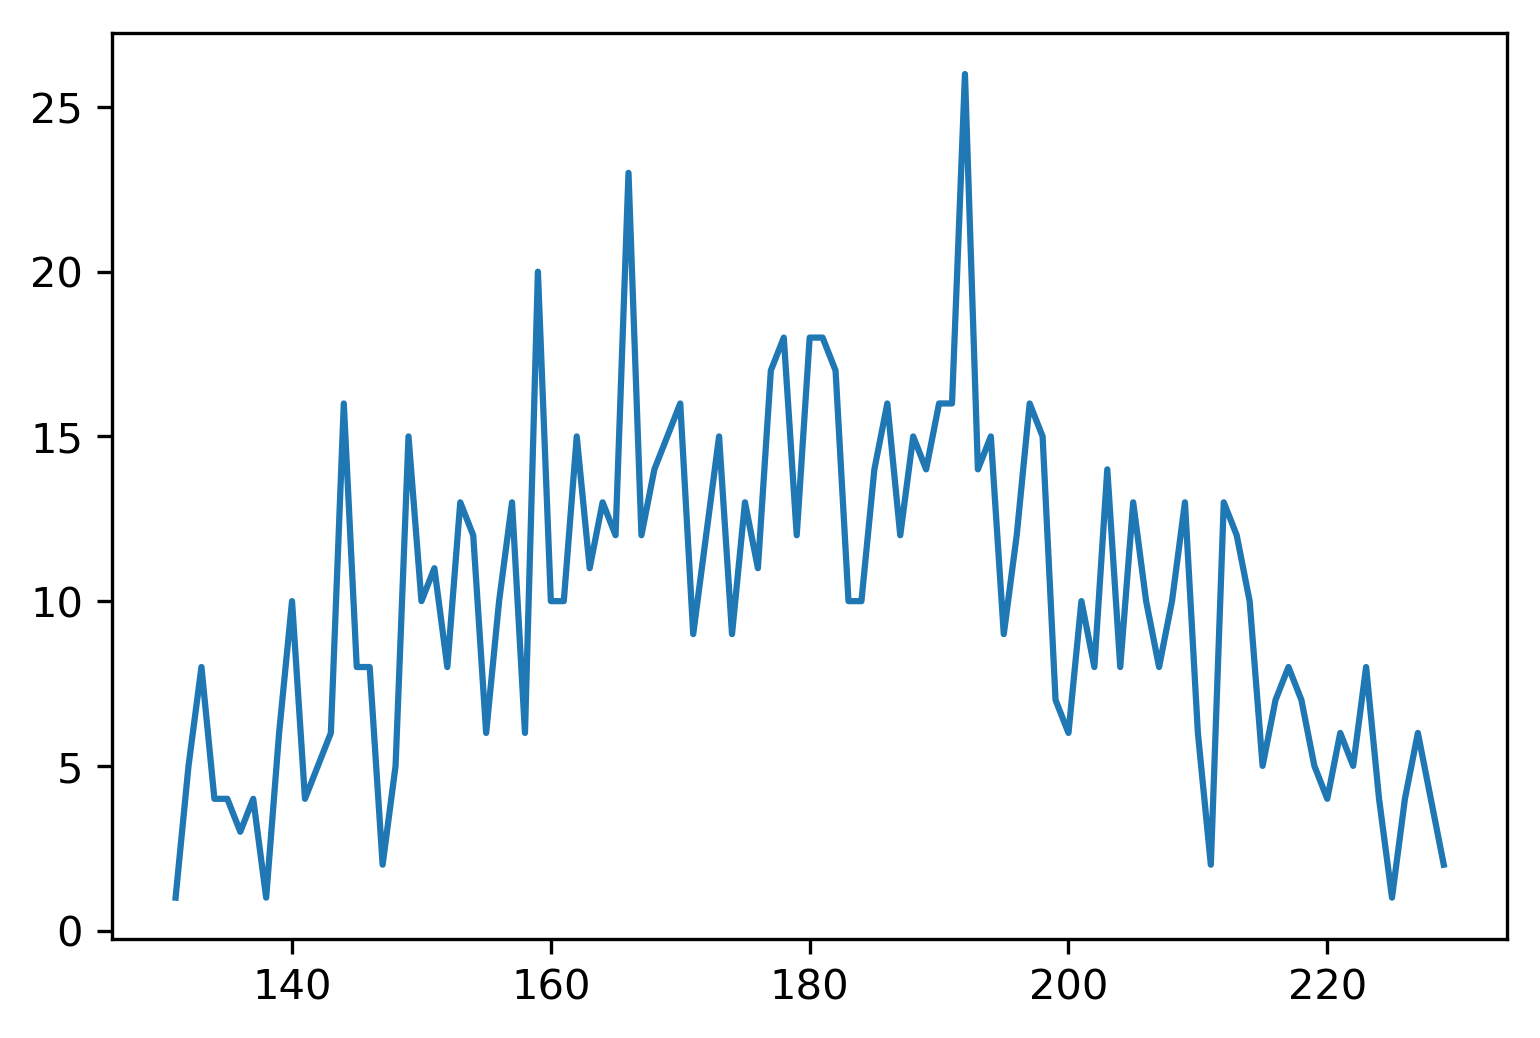

In [95]:
from random import normalvariate

n = 1000

values = []
frequencies = {}

while len(values) < n:
    value = int(normalvariate(180, 30))
    if 130 < value < 230:
        frequencies[value] = frequencies.get(value, 0) + 1
        values.append(value)

freq = list(frequencies.items())
freq.sort()


plt.plot(*list(zip(*freq)))
plt.show()

<br><br>

### Übung mit Binärsender

Es ist vielleicht keine schlechte Idee, folgende Funktion als Übung selbst zu schreiben.
Die Funktion soll mit einem Parameter p aufgerufen werden, der einen Wahrscheinlichkeitswert zwischen 0 und 1 beinhaltet. Die Funktion liefert eine 1 mit der Wahrscheinlichkeit von p, d.h. in p Prozent der Fälle werden 1en zurückgegeben und 0en in (1-p) Prozent der Fälle:

In [96]:
import random

def random_ones_and_zeros(p):
    """ p: probability 0 <= p <= 1
        returns a 1 with the probability p
    """
    x = random.random()
    if x < p:
        return 1
    else:
        return 0
    

Wir testen unsere kleine Funktion:

In [97]:
n = 1000000
sum(random_ones_and_zeros(0.8) for i in range(n)) / n

0.800606

Eine weitere gute Idee ist es, die Aufgabe mit einem Generator zu implementieren.

Sollten Sie nicht mit der Arbeitsweise eines Python-Generators vertraut sein, empfehlen wir unser [Kapitel zu Generatoren und Iteratoren](python3_generatoren.php) aus dem Python-Tutorial.


In [98]:
import random

def random_ones_and_zeros(p):
    while True:
        x = random.random()
        yield 1 if x < p else 0
        
def firstn(generator, n):
    for i in range(n):
        yield next(generator)

In [99]:
n = 1000000

firstn_values = firstn(random_ones_and_zeros(0.8), n)
sum(x for x in firstn_values) / n

0.799768



<img width=350 class="imgright" src="../images/lighthouses_bitstreams.webp" srcset="../images/lighthouses_bitstreams_700w.webp 700w,../images/lighthouses_bitstreams_600w.webp 600w,../images/lighthouses_bitstreams_500w.webp 500w,../images/lighthouses_bitstreams_400w.webp 400w,../images/lighthouses_bitstreams_350w.webp 350w,../images/lighthouses_bitstreams_300w.webp 300w" alt="Bitstreams Lighthouses" />


Unser 0en-und-1en-Generator kann wie ein Sender betrachtet werden, der 0en und 1en mit einer Wahrscheinlichkeit von p, respektive (1-p), abgibt.

Wir schreiben nun einen anderen Generator, der diesen Bitstrom empfängt.
Die Aufgabe dieses neuen Generators ist es, den Bitstrom zu lesen und einen anderen Bitstrom aus 0en und 1en zu erzeugen mit einer Wahrscheinlichkeit von 0.5, ohne die Wahrscheinlichkeit p zu kennen.
Es sollte für jeden beliebigen Wert p funktionieren.


<sup>1</sup>


In [100]:
def ebitter(bitstream):
    while True:
        bit1 = next(bitstream)
        bit2 = next(bitstream)
        if bit1 + bit2 == 1:
            bit3 = next(bitstream)
            if bit2 + bit3 == 1:
                yield 1
            else:
                yield 0
        

In [101]:
def ebitter2(bitstream):
    bit1 = next(bitstream)
    bit2 = next(bitstream)
    bit3 = next(bitstream)
    while True:
        if bit1 + bit2 == 1:
            if bit2 + bit3 == 1:
                yield 1
            else:
                yield 0
        bit1, bit2, bit3 = bit2, bit3, next(bitstream)

In [102]:
n = 1000000
sum(x for x in firstn(ebitter(random_ones_and_zeros(0.8)), n)) / n

0.499749

In [103]:
n = 1000000
sum(x for x in firstn(ebitter2(random_ones_and_zeros(0.8)), n)) / n

0.500011

**Grundlagen der Theorie:**

Unser erster Generator erzeugt einen Bitstrom B<sub>0</sub>, B<sub>1</sub>, B<sub>2</sub>,...

Wir prüfen nun ein beliebiges Paar aufeinanderfolgender Bits B<sub>i</sub>, B<sub>i+1</sub>,...

Ein solches Paar kann die Werte 01, 10, 00 oder 11 haben. Die Wahrscheinlichkeit p(01) = (p-1) x p und die Wahrscheinlichkeit p(10) = p x (p-1) ergibt eine kombinierte Wahrscheinlichkeit, dass die aufeinanderfolgenden Bits entweder 01 oder 10 sind, von 2 x (p-1) x p.

Betrachten wir ein anderes Bit B<sub>i+2</sub>.
Wie ist die Wahrscheinlichkeit dieser beiden

B<sub>i</sub> + B<sub>i+1</sub> = 1

und 

B<sub>i+1</sub> + B<sub>i+2</sub> = 1  ?

Die möglichen Ausgaben passen auf die Bedingungen, und die zugehörigen Wahrscheinlichkeiten sind in der folgenden Tabelle aufgeführt:

<br>
<!-- table_width: 0.5 column_lines: False row_lines: False -->
    
| Wahrscheinlichkeit  |  B<sub>i</sub> | B<sub>i+1</sub> | B<sub>i+2</sub> |
|:------------|----------|------|------|
|p<sup>2</sup> x (1-p)|0|1|0|
|p x (1 - p)<sup>2</sup>|1|0|1|




Wir bezeichnen das Ergebnis sum(B<sub>i</sub>, B<sub>i+1</sub>)=1 als X<sub>1</sub> und entsprechend dazu sum(B<sub>i+1</sub>, B<sub>i+2</sub>)=1 als X<sub>2</sub>.

Die verknüpfte Wahrscheinlichkeit P(X<sub>1</sub>, X<sub>2</sub>) = p<sup>2</sup> x (1-p) + p x (1 - p)<sup>2</sup> kann zu p x (1-p) umgestellt werden.

Die bedingte Wahrscheinlichkeit von X<sub>2</sub> gibt X<sub>1</sub>:

P(X<sub>2</sub> | X<sub>1</sub>) = P(X<sub>1</sub>, X<sub>2</sub>) / P(X<sub>2</sub>)

P(X<sub>2</sub> | X<sub>1</sub>) =  p x (1-p)  /  2 x p x (1-p) = 1 / 2

<br><br>

### Synthetische Verkaufszahlen


In diesem Unterkapitel geht es um die synthetische Erzeugung von Daten. Dazu erzeugen wir eine Datei mit Verkaufszahlen einer fiktiven Kette von Geschäften in diversen europäischen Städten.

Wir beginnen mit einem Array ```sales``` mit Verkaufszahlen für das Jahr 1997:

In [104]:
import numpy as np

sales = np.array([1245.89, 2220.00, 1635.77, 1936.25, 1002.03, 
                  2099.13,  723.99, 990.37, 541.44, 1765.00, 
                  1802.84, 1999.00])

Das Ziel ist, eine kommaseparierte Liste zu erzeugen, wie wir sie aus Excel kennen. Die Datei soll fiktive Verkaufszahlen für unsere nicht-existierenden Ladenlokale für die Jahre von 1997 bis 2018 enthalten.

Wir fügen für jedes Jahr den Verkaufszahlen noch zufällige Werte hinzu. Dafür konstruieren wir ein Array mit Wachstumsraten. Die Wachstumsraten können variieren zwischen einem minimalen Prozent-Wert (```min_percent```) und einem maximalen Prozent-Wert (```max_percent```):

In [105]:
min_percent = 0.98  # corresponds to 0.98 %
max_percent = 1.06   # 6 %

sample = np.random.random_sample(12)
print(sample)
growthrates = (max_percent - min_percent) * sample + min_percent
print(growthrates)

[0.76709447 0.31841101 0.64330855 0.13591889 0.09436673 0.2097398
 0.02373195 0.25975183 0.87423196 0.32085012 0.06566312 0.04253395]
[1.04136756 1.00547288 1.03146468 0.99087351 0.98754934 0.99677918
 0.98189856 1.00078015 1.04993856 1.00566801 0.98525305 0.98340272]


Für die neuen Verkaufszahlen nach einem Jahr multiplizieren wir das ```sales```-Array mit dem ```growthrates```-Array:

In [106]:
sales * growthrates

array([1297.42942665, 2232.14979487, 1687.2389867 , 1918.57883625,
        989.55406327, 2092.3690888 ,  710.88473563,  991.14263363,
        568.47873238, 1775.00403702, 1776.25360838, 1965.82202987])

Um eine nachhaltige Verkaufsentwicklung zu erhalten, verändern wir die Wachstums-Raten alle 5 Jahre.

Das ist unser komplettes Programm, welches die Daten in der Datei ```sales_figures.csv``` ablegt:

In [107]:
import numpy as np
fh = open("sales_figures.csv", "w")

fh.write("Year, Frankfurt, Munich, Berlin, Zurich, Hamburg, \
         London, Paris, Luxembourg, Wien, Amsterdam, \
         Rotterdam, The Hague\n")
sales = np.array([1245.89, 2220.00, 1635.77, 1936.25, 1002.03, 
                  2099.13,  723.99, 990.37, 541.44, 1765.00, 
                  1802.84, 1999.00])

for year in range(1997, 2018):
    line = str(year) + ", " + ", ".join(map(str, sales))
    fh.write(line + "\n")
    if year % 4 == 0:
         min_percent = 0.98  # corresponds to -1.5 %
         max_percent = 1.06   # 6 %
         sample = np.random.random_sample(12)
         growthrates = (max_percent - min_percent) * sample + min_percent         
    sales = np.around(sales * growthrates, 2)
fh.close()

Das Ergebnis ist in der Datei ```sales_figures.csv``` zu finden.

Wir werden diese Daten in einem folgenden Kapitel (Lesen und Schreiben in NumPy) noch benutzen.

In [108]:
# prog4book"
from random import randint

outcomes = [ randint(1, 6) for _ in range(10000)]

even_pips = [ x for x in outcomes if x % 2 == 0]
greater_two = [ x for x in outcomes if x > 2]

combined = [ x for x in outcomes if x % 2 == 0 and x > 2]

print(len(even_pips) / len(outcomes))
print(len(greater_two) / len(outcomes))
print(len(combined) / len(outcomes))


0.5057
0.6716
0.3397


#### Lösung 2. Aufgabe

Wir schreiben zuerst die Funktion "process_datafile", um die Daten aus der Datei zu verarbeiten:


In [109]:
# prog4book"
def process_datafile(filename):
    """ process_datafile -> (universities, 
                             enrollments, 
                             total_number_of_students) 
        universities: list of University names
        enrollments: corresponding list with enrollments
        total_number_of_students: over all universities
    """

    universities = []
    enrollments = []
    with open(filename) as fh:
        total_number_of_students = 0
        fh.readline() # get rid of descriptive first line
        for line in fh:
             line = line.strip()
             *praefix, under, post, total = line.rsplit()
             university = praefix[1:]
             total = int(total.replace(",", ""))
             enrollments.append(total)
             universities.append(" ".join(university))
             total_number_of_students += total
    return (universities, enrollments, total_number_of_students)

Lassen wir die Funktion laufen und prüfen das Ergebnis:

In [110]:
# prog4book"
universities, enrollments, total_students = \
                       process_datafile("universities_uk.txt")

for i in range(14):
    print(universities[i], end=": ")
    print(enrollments[i])
print("Number of students enrolled in the UK: ", total_students)

Open University in England: 123490
University of Manchester: 37925
University of Nottingham: 33270
Sheffield Hallam University: 33100
University of Birmingham: 32335
Manchester Metropolitan University: 32160
University of Leeds: 30975
Cardiff University: 30180
University of South Wales: 29195
University College London: 28430
King's College London: 27645
University of Edinburgh: 27625
Northumbria University: 27565
University of Glasgow: 27390
Number of students enrolled in the UK:  2299380


Wir wollen einen virtuellen Studenten in eine zufällige Universität einschreiben. Um eine gewichtete Liste zu erhalten, die für die ```weighted_choice``` geeignet ist, müssen wir die Werte der Liste ```enrollments``` normalisieren:

In [111]:
# prog4book"
normalized_enrollments = [ students / total_students \
                          for students in enrollments]

# enrolling a virtual student:
print(weighted_choice(universities, normalized_enrollments))

University of Plymouth


Die Aufgabe war 100,000 fiktive Studenten zu "immatrikulieren".
Dies kann mit einer Schleife einfach durchgeführt werden:

In [112]:
# prog4book"
from collections import Counter
from pprint import pprint # schöne Print-Ausgabe

outcomes = []
n = 100000
for i in range(n):
    outcomes.append(weighted_choice(universities, 
                                    normalized_enrollments))

c = Counter(outcomes)
    
pprint(c.most_common(20), indent=2, width=70)

[ ('Open University in England', 5385),
  ('University of Manchester', 1635),
  ('University of Birmingham', 1491),
  ('Sheffield Hallam University', 1445),
  ('University of Nottingham', 1428),
  ('Manchester Metropolitan University', 1381),
  ('University of Leeds', 1349),
  ('Cardiff University', 1314),
  ('University of South Wales', 1276),
  ('University of Central Lancashire', 1262),
  ('University of Plymouth', 1257),
  ('Nottingham Trent University', 1254),
  ('University of Glasgow', 1245),
  ('University College London', 1185),
  ('Northumbria University', 1164),
  ('University of Edinburgh', 1163),
  ('University of the West of England', 1141),
  ('Ulster University', 1136),
  ("King's College London", 1134),
  ('University of Sheffield', 1129)]



#### Lösung 3. Aufgabe


Die Sammlung der Amazonen ist als Liste implementiert, während für die Menge aus Pysseusses Favoritinnen auswählen.
Die Gewichtung liegt zu Beginn bei 1/11 für alle, d.h. 1/len(amazons).

Jeder Schleifen-Durchlauf entspricht einem neuen Tag. Jedes Mal, wenn wir einen neuen Durchlauf starten, ziehen wir ```n``` Samples aus den Pythoniern, um das Verhältnis zu berechnen, wie oft die Sample gleich den Favoritinnen des Königs, geteilt durch die Häufigkeit, wie oft die Sample nicht der Idee einer Schwiegertochter entspricht. Dies entspricht der Wahrscheinlichkeit ```prob```. Wir stoppen das erste Mal, wenn die Wahrscheinlichkeit bei 0.9 oder größer liegt.

Die beiden Funktionen ```weighted_same``` und ```weighted_same_alternative``` lassen sich für die Ziehung verwenden.

In [113]:
import time

amazons = ["Airla", "Barbara", "Eos",
           "Glykeria", "Hanna", "Helen",
           "Agathangelos", "Iokaste", 
           "Medousa", "Sofronia", 
           "Andromeda"]

weights = [ 1/len(amazons) for _ in range(len(amazons)) ]

Pytheusses_favorites = {"Iokaste", "Medousa", 
                        "Sofronia", "Andromeda"}
n = 1000
counter = 0

prob = 1 / 330
days = 0
factor1 = 1 / 13
factor2 = 1 / 12

start = time.perf_counter()
while prob < 0.9:
    for i in range(n):
        the_chosen_ones = weighted_sample_alternative(amazons, 
                                                      weights, 
                                                      4)
        if set(the_chosen_ones) == Pytheusses_favorites:
            counter += 1
    prob = counter / n
    counter = 0
    weights[:7] = [ p - p*factor1 for p in weights[:7] ]
    weights[7:] = [ p + p*factor2 for p in weights[7:] ]
    weights = [ x / sum(weights) for x in weights]
    days += 1
print(time.perf_counter() - start)

print("Number of days, he has to wait: ", days)


2.0128858579555526
Number of days, he has to wait:  32


Die Werte für die Anzahl der Tage weichen ab, wenn n nicht groß genug ist.

Der folgende Code ist die Lösung ohne Rundungsfehler. Wir verwenden ```Fraction``` aus dem Modul ```fractions```.

In [114]:
import time
from fractions import Fraction


amazons = ["Airla", "Barbara", "Eos",
           "Glykeria", "Hanna", "Helen",
           "Agathangelos", "Iokaste", 
           "Medousa", "Sofronia", 
           "Andromeda"]

weights = [ Fraction(1, 11) for _ in range(len(amazons)) ]

Pytheusses_favorites = {"Iokaste", "Medousa", 
                        "Sofronia", "Andromeda"}
n = 1000
counter = 0

prob = Fraction(1, 330)
days = 0
factor1 = Fraction(1, 13)
factor2 = Fraction(1, 12)

start = time.perf_counter()
while prob < 0.9:
    #print(prob)
    for i in range(n):
        the_chosen_ones = weighted_sample_alternative(amazons, weights, 4)
        if set(the_chosen_ones) == Pytheusses_favorites:
            counter += 1
    prob = Fraction(counter, n)
    counter = 0
    weights[:7] = [ p - p*factor1 for p in weights[:7] ]
    weights[7:] = [ p + p*factor2 for p in weights[7:] ]
    weights = [ x / sum(weights) for x in weights]
    days += 1
print(time.perf_counter() - start)

print("Number of days, he has to wait: ", days)

20.071284992969595
Number of days, he has to wait:  32


Wir können sehen, dass die Lösung mit ```fractions``` schön aber langsam ist.
Dabei spielt die Präzision in unserem Fall keine Rolle.

Jedoch haben wir die Leistung von Python nicht genutzt.
Das machen wir in der nächsten Implementierung:

In [115]:
import time
import numpy as np

amazons = ["Airla", "Barbara", "Eos",
           "Glykeria", "Hanna", "Helen",
           "Agathangelos", "Iokaste", 
           "Medousa", "Sofronia", 
           "Andromeda"]

weights = np.full(11, 1/len(amazons))


Pytheusses_favorites = {"Iokaste", "Medousa", 
                        "Sofronia", "Andromeda"}


n = 1000
counter = 0

prob = 1 / 330
days = 0
factor1 = 1 / 13
factor2 = 1 / 12

start = time.perf_counter()
while prob < 0.9:
    for i in range(n):
        the_chosen_ones = weighted_sample_alternative(amazons, 
                                                      weights, 
                                                      4)
        if set(the_chosen_ones) == Pytheusses_favorites:
            counter += 1
    prob = counter / n
    counter = 0
    weights[:7] = weights[:7] - weights[:7] * factor1
    weights[7:] = weights[7:] + weights[7:] * factor2
    weights = weights / np.sum(weights)
    #print(weights)
    days += 1
print(time.perf_counter() - start)

print("Number of days, he has to wait: ", days)

2.0671991429990157
Number of days, he has to wait:  32



<br><br>
<hr>
<br>



### Fußnoten:

<br>
<sup>1</sup>  Ich bedanke mich bei Dr. Hanno Baehr der mich auf das Problem der "Zufalls-Extrahierung" aufmerksam gemacht hat bei der Teilnahme eine Python-Training-Kurses in Nürnberg im Januar 2014. Hanno hat ein paar Bits des theoretischen Rahmens entworfen. Während einer Nacht-Session in der Bar "Zeit & Raum" (engl. "Time & Space") habe ich ein entsprechendes Python-Programm implementiert um die theoretische Lösung empirisch zu unterstützen.
